In [48]:
import numpy as np
import pandas as pd

%cd /mnt/c/Users/resha/Downloads

/mnt/c/Users/resha/Downloads


In [3]:
df = pd.read_csv('GLB.Ts+dSST.csv')

In [49]:
df = pd.read_csv('dv2.txt', sep='\t')  # USGS 04159130 ST. CLAIR RIVER AT PORT HURON, MI

In [50]:
df.dropna(inplace=True)
df

,agency_cd,site_no,datetime,249642_00060_00003,249642_00060_00003_cd,256434_30208_00003,256434_30208_00003_cd,70916_00065_00003,70916_00065_00003_cd
31,USGS,4159130,2008-11-01,189000,A:e,5340,A:e,576.92,A
32,USGS,4159130,2008-11-02,176000,A:e,4980,A:e,576.60,A
33,USGS,4159130,2008-11-03,174000,A:e,4920,A:e,576.55,A
34,USGS,4159130,2008-11-04,176000,A:e,5000,A:e,576.62,A
35,USGS,4159130,2008-11-05,179000,A:e,5070,A:e,576.66,A
...,...,...,...,...,...,...,...,...,...
6196,USGS,4159130,2025-09-18,196000,P,5550,P,577.93,P
6197,USGS,4159130,2025-09-19,199000,P,5640,P,577.92,P
6198,USGS,4159130,2025-09-20,193000,P,5450,P,577.74,P
6199,USGS,4159130,2025-09-21,188000,P,5330,P,577.69,P


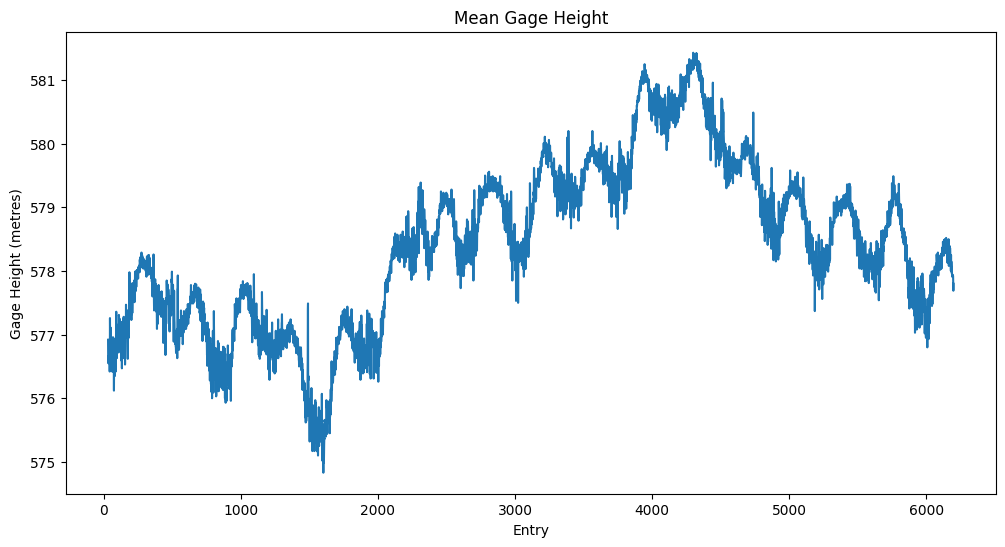

In [51]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(df.index, df['70916_00065_00003'])
plt.xlabel('Entry')
plt.ylabel('Gage Height (metres)')
plt.title('Mean Gage Height')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['249642_00060_00003']) # Mean Discharge, cubic feet per second
print(f'ADF Statistic:{result[1]:.5f} ; p-value < 0.05: {result[1] < 0.05} Stationarity')

result = adfuller(df['256434_30208_00003']) # Mean Discharge, cubic meters per second
print(f'ADF Statistic:{result[1]:.5f} ; p-value < 0.05: {result[1] < 0.05} Stationarity')

result = adfuller(df['70916_00065_00003']) # Mean Gage height, feet
print(f'ADF Statistic:{result[1]:.5f} ; p-value < 0.05: {result[1] < 0.05} Stationarity')


ADF Statistic:0.00009 ; p-value < 0.05: True Stationarity
ADF Statistic:0.00009 ; p-value < 0.05: True Stationarity
ADF Statistic:0.30447 ; p-value < 0.05: False Stationarity


In [42]:
df

,Station_Name,THUNDER BAY,ONTARIO
0,Station_Number,10050,NaN
1,Latitude_Decimal_Degrees,48.409398,NaN
2,Longitude_Decimal_Degrees,89.217299,NaN
3,Datum,CD,NaN
4,Time_Zone,EST,NaN
...,...,...,...
40745,2024/12/27,0.013,NaN
40746,2024/12/28,0.009,NaN
40747,2024/12/29,-0.002,NaN
40748,2024/12/30,-0.018,NaN


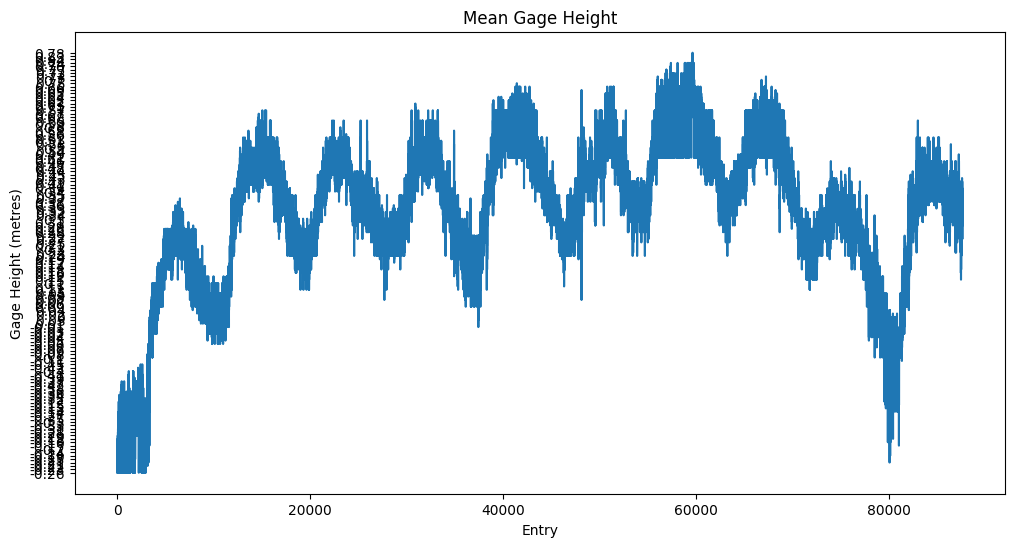

In [53]:
# same gage height data but from the source website Fisheries and Oceans Canada

df = pd.read_csv('10050-01-JAN-2013_slev.csv') # Daily mean Gage height, metres
# df = pd.read_csv('11940-23-SEP-2015_slev.csv') 
slev_series = df[7:]['THUNDER BAY'].reset_index(drop=True)
# plot

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(slev_series.index, slev_series.values)
plt.xlabel('Entry')
plt.ylabel('Gage Height (metres)')
plt.title('Mean Gage Height')
plt.show()

In [46]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(slev_series) # Mean Gage height, metres
print(f'ADF Statistic:{result[1]:.5f} ; p-value < 0.05: {result[1] < 0.05} Stationarity')

ADF Statistic:0.04456 ; p-value < 0.05: True Stationarity


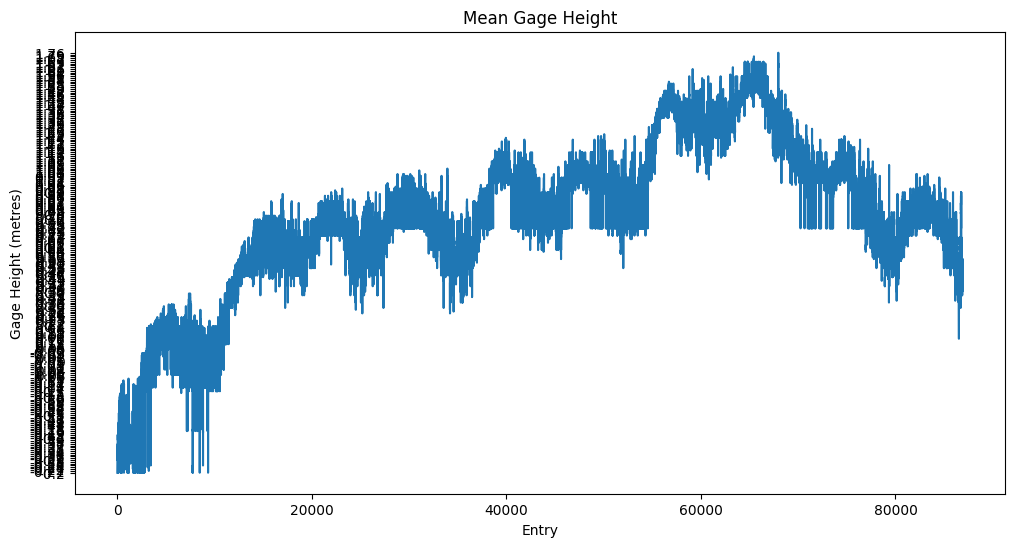

In [61]:
# same gage height data but from the source website Fisheries and Oceans Canada

df = pd.read_csv('11860-01-JAN-2013_slev.csv') # Daily mean Gage height, metres
# df = pd.read_csv('11940-23-SEP-2015_slev.csv') 
slev_series = df[7:]['GODERICH'].reset_index(drop=True)
# plot

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(slev_series.index, slev_series.values)
plt.xlabel('Entry')
plt.ylabel('Gage Height (metres)')
plt.title('Mean Gage Height')
plt.show()

In [62]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(slev_series) # Mean Gage height, metres
print(f'ADF Statistic:{result[1]:.5f} ; p-value < 0.05: {result[1] < 0.05} Stationarity')

ADF Statistic:0.01495 ; p-value < 0.05: True Stationarity


# Looking for larger similar datasets

In [19]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from urllib.parse import urljoin
import time

# --- Configuration ---
# The base URL for the station pages, used to construct the full link from relative paths.
BASE_URL = "https://www.meds-sdmm.dfo-mpo.gc.ca/isdm-gdsi/twl-mne/inventory-inventaire/"
# The main URL containing the list of stations.
LIST_URL = urljoin(BASE_URL, "list-liste-eng.asp?user=ISDM-GDSI&region=CA&tst=1")

# List to store the extracted data
station_data = []

print("Starting web scraping process...")
print("-" * 30)

# 1. Fetch the main station list page
try:
    list_response = requests.get(LIST_URL, timeout=15)
    list_response.raise_for_status() # Raise an exception for bad status codes (4xx or 5xx)
    list_soup = BeautifulSoup(list_response.content, 'html.parser')
except requests.exceptions.RequestException as e:
    print(f"Error fetching the station list page: {e}")
    exit()

# 2. Find the station table
# The script targets the table containing the station information.
table = list_soup.find('table') # Finding the main table element

if not table:
    print("Could not find the station table on the list page. Exiting.")
    exit()

# Get all table rows and skip the header row (starting from index 1)
rows = table.find_all('tr')[1:]
print(f"Found {len(rows)} stations to process.")

# 3. Iterate through stations, fetch individual pages, and extract data
for i, row in enumerate(rows):
    # The link to the station page is in the first column (td)
    try:
        station_id_cell = row.find_all('td')[0]
        station_link_tag = station_id_cell.find('a')

        if station_link_tag and station_link_tag.text and station_link_tag.get('href'):
            station_id = station_link_tag.text.strip()
            relative_url = station_link_tag['href']
            # Construct the full URL for the station page
            full_station_url = urljoin(BASE_URL, relative_url)
        else:
            print(f"Warning: Skipping row {i+1} due to missing link or ID.")
            continue

        print(f"-> Processing station {i+1}/{len(rows)}: {station_id}")

        # Introducing a small delay to be polite to the server
        time.sleep(0.5)

        # 4. Fetch the individual station page
        station_response = requests.get(full_station_url, timeout=15)
        station_response.raise_for_status()
        station_soup = BeautifulSoup(station_response.content, 'html.parser')

        # 5. Extract the text from the div with id="digital_info"
        station_data_rows = station_soup.find('table', id='digital').find_all('tr')[1:]
        entries_count = len(station_data_rows)
        print(f"   Found {entries_count} data entries in 'digital' table.")


        # 6. Store the Station ID and the extracted text
        station_data.append({
            'Station_ID': station_id,
            'Data_Entries_Count': entries_count
        })

    except requests.exceptions.RequestException as e:
        print(f"   ERROR: Could not fetch page for {station_id}. {e}")
        station_data.append({
            'Station_ID': station_id,
            'Digital_Info_Text': f"FETCH ERROR: {e}"
        })
    except IndexError:
        print(f"   ERROR: Row {i+1} did not have the expected column structure.")
    except Exception as e:
        print(f"   An unexpected error occurred for station {station_id}: {e}")

print("-" * 30)
print("Scraping complete. Creating DataFrame.")

# 7. Create the DataFrame
df = pd.DataFrame(station_data)

# 8. Display the resulting DataFrame
print("\nResulting DataFrame (first 5 rows):")
print(df.head())

# To save the data to a file (optional)
# df.to_csv('station_digital_info.csv', index=False)
# print("\nData saved to station_digital_info.csv")

Starting web scraping process...
------------------------------
Found 310 stations to process.
-> Processing station 1/310: 3736
   Found 1 data entries in 'digital' table.
-> Processing station 2/310: 3740
   Found 1 data entries in 'digital' table.
-> Processing station 3/310: 3765
   Found 37 data entries in 'digital' table.
-> Processing station 4/310: 3782
   Found 2 data entries in 'digital' table.
-> Processing station 5/310: 3785
   Found 1 data entries in 'digital' table.
-> Processing station 6/310: 3788
   Found 1 data entries in 'digital' table.
-> Processing station 7/310: 3800
   Found 1 data entries in 'digital' table.
-> Processing station 8/310: 3840
   Found 1 data entries in 'digital' table.
-> Processing station 9/310: 3916
   Found 1 data entries in 'digital' table.
-> Processing station 10/310: 3932
   Found 1 data entries in 'digital' table.
-> Processing station 11/310: 3940
   Found 1 data entries in 'digital' table.
-> Processing station 12/310: 3958
   Found 

In [23]:
df.sort_values(by='Data_Entries_Count', ascending=False)[:10]

,Station_ID,Data_Entries_Count
159,10050,120
184,11860,96
61,5010,91
197,12400,83
206,13320,68
202,13030,68
198,12710,68
167,11070,67
162,10750,67
209,13590,67


                    timestamp  temperature  humidity
0  2025-08-24T23:04:19.058862         24.9      70.0
1  2025-08-24T23:35:38.295995         24.4      73.0
2  2025-08-25T09:03:40.012554         27.3      60.0
3  2025-08-25T09:33:40.444481         27.3      60.0
4  2025-08-25T10:03:40.818912         27.2      60.0


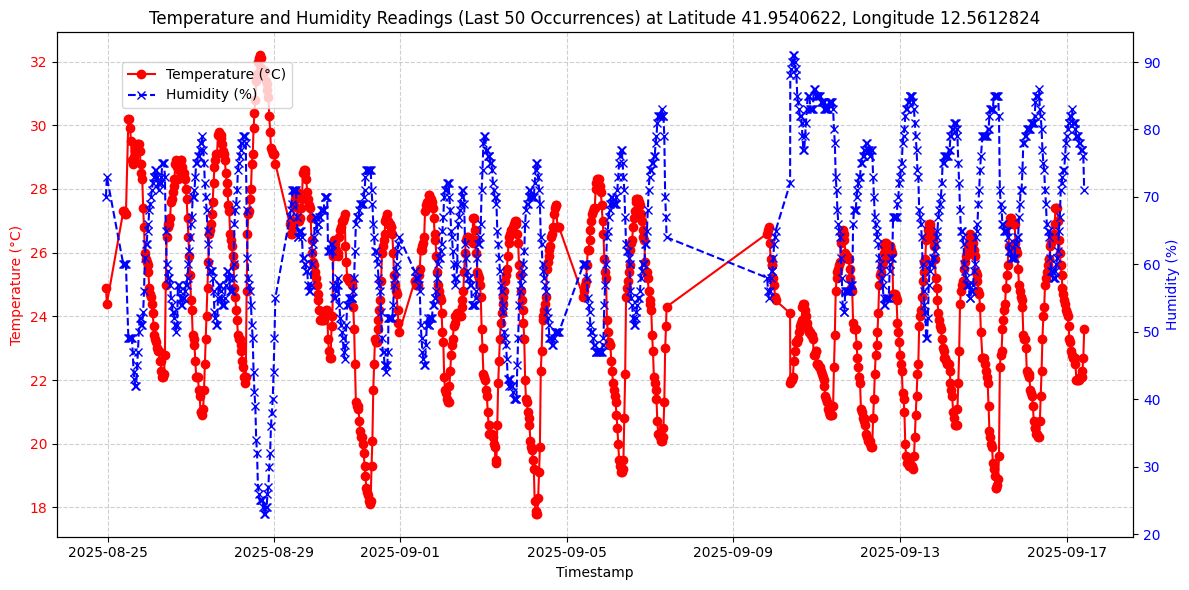

In [58]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import io

# Connect to the SQLite database
try:
    conn = sqlite3.connect('archive/weather.db')
    cursor = conn.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()

    # Query the database to get the last 50 entries
    query = """
    SELECT
        timestamp,
        temperature,
        humidity
    FROM
        sensor_readings
    WHERE
        latitude = 41.9540622 AND longitude = 12.5612824
    ORDER BY
        timestamp DESC
    """
    df = pd.read_sql_query(query, conn)
    
    # Reverse the DataFrame to plot data chronologically
    df = df.iloc[::-1].reset_index(drop=True)
    
    print(df.head())
    
except sqlite3.Error as e:
    print(f"Database error: {e}")
finally:
    if conn:
        conn.close()

# Convert the timestamp column to datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Create a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot temperature on the first y-axis
ax1.plot(df['timestamp'], df['temperature'], color='red', marker='o', label='Temperature (°C)')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Temperature (°C)', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.grid(True, linestyle='--', alpha=0.6)

# Create a second y-axis for humidity
ax2 = ax1.twinx()
ax2.plot(df['timestamp'], df['humidity'], color='blue', marker='x', linestyle='--', label='Humidity (%)')
ax2.set_ylabel('Humidity (%)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add titles and legends
plt.title('Temperature and Humidity Readings (Last 50 Occurrences) at Latitude 41.9540622, Longitude 12.5612824')
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Improve x-axis ticks for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()
